In [6]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import io
import requests
import matplotlib.dates as mdates


In [7]:

url="https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv"
url1="https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"
url2="https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
s=requests.get(url).content
s1=requests.get(url1).content
s2=requests.get(url2).content

data_province=pd.read_csv(io.StringIO(s.decode('utf-8')))
data_regioni=pd.read_csv(io.StringIO(s1.decode('utf-8')))
data_nazione=pd.read_csv(io.StringIO(s2.decode('utf-8')))



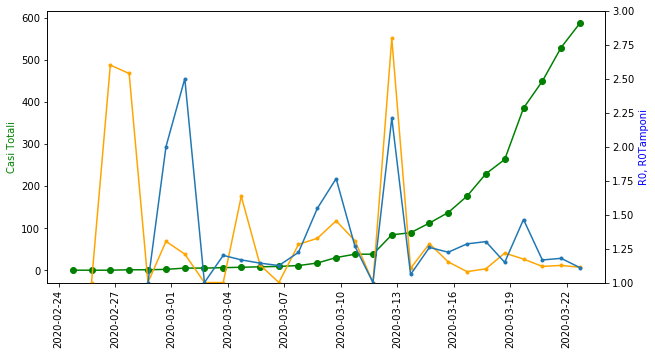

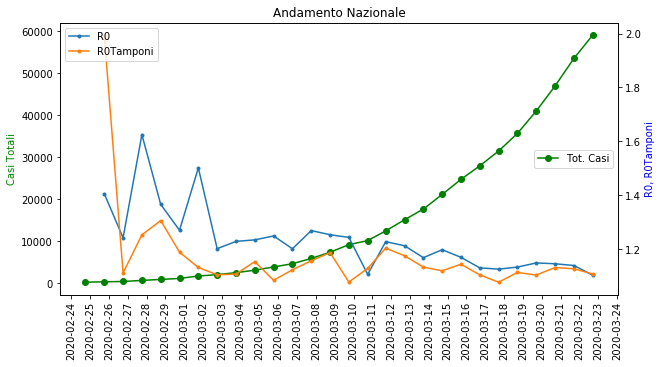

In [8]:
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(pd.to_datetime(data_nazione.data),data_nazione.totale_casi,marker='o', color='green',label="Tot. Casi")
ax2.plot(pd.to_datetime(data_nazione.data),data_nazione.totale_casi/data_nazione.totale_casi.shift(1),marker='.',label="R0")
ax2.plot(pd.to_datetime(data_nazione.data),data_regioni.groupby('data').sum().tamponi/data_regioni.groupby('data').sum().tamponi.shift(1),marker='.',label="R0Tamponi")

ax1.set_ylabel('Casi Totali', color='g')
ax2.set_ylabel('R0, R0Tamponi', color='b')

plt.setp( ax1.xaxis.get_majorticklabels(), rotation=90 )
ax1.xaxis.set_major_locator(mdates.DayLocator())
ax1.legend(loc='center right')
ax2.legend(loc='upper left')
plt.title("Andamento Nazionale")
plt.plot()

#plt.plot(pd.to_datetime(data_nazione.data),dat_reg.terapia_intensiva,marker='x')


plt.show()






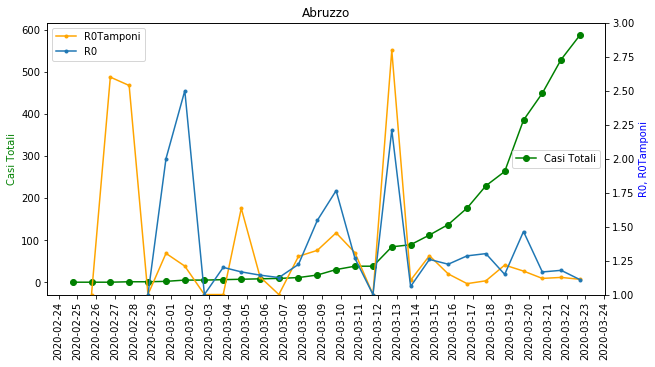

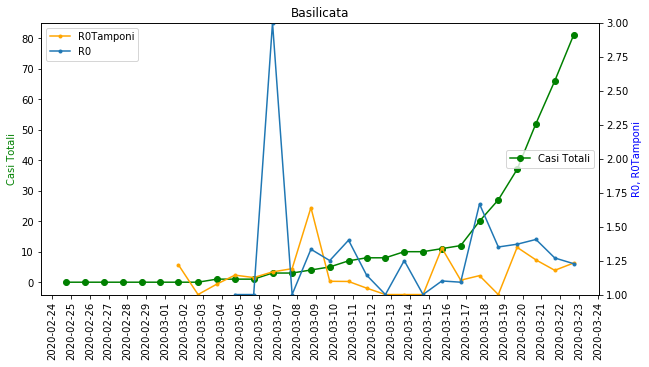

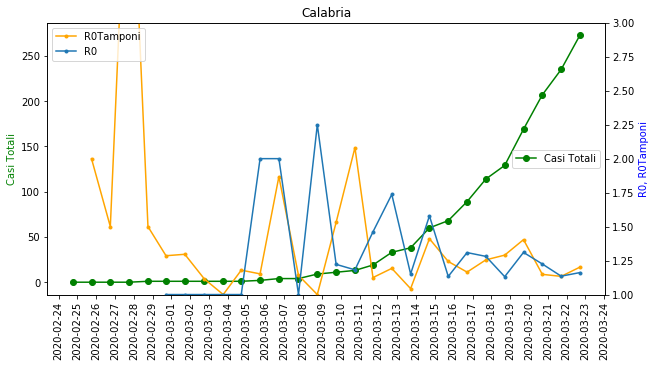

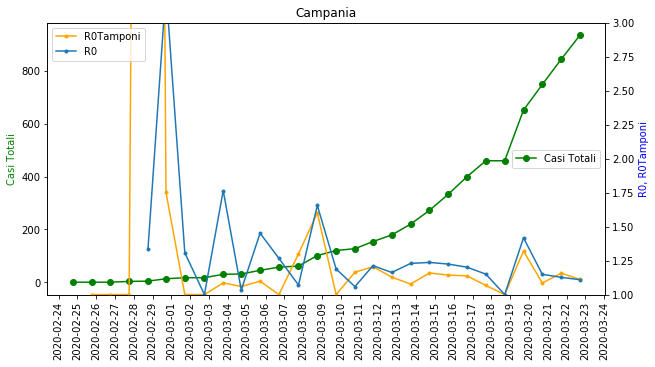

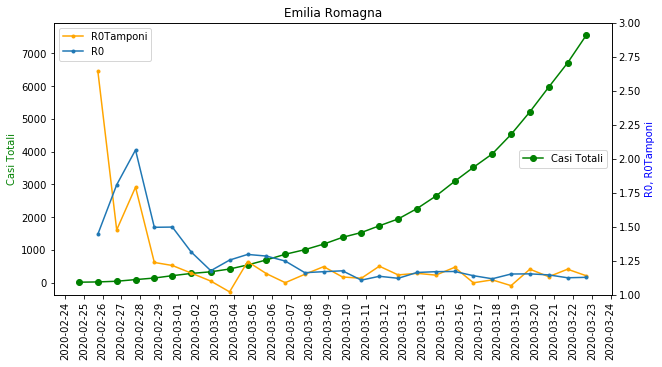

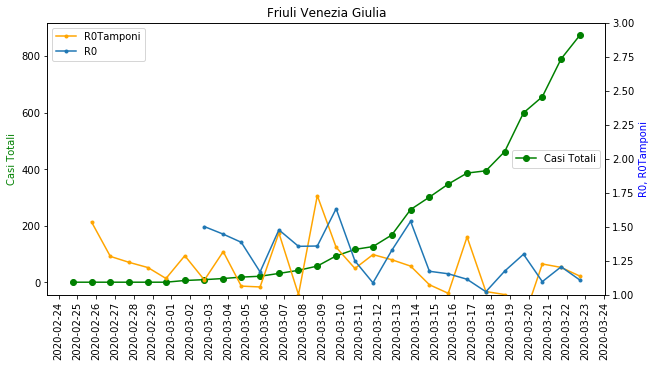

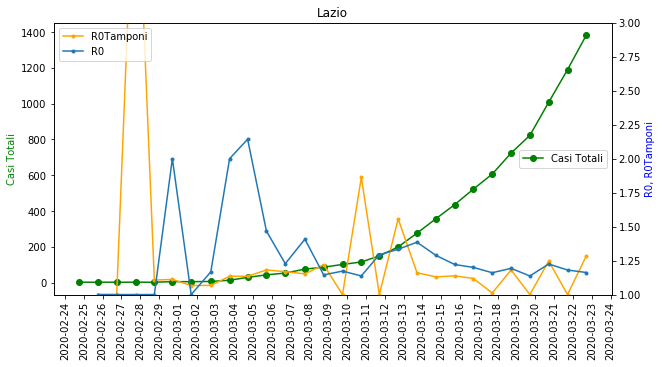

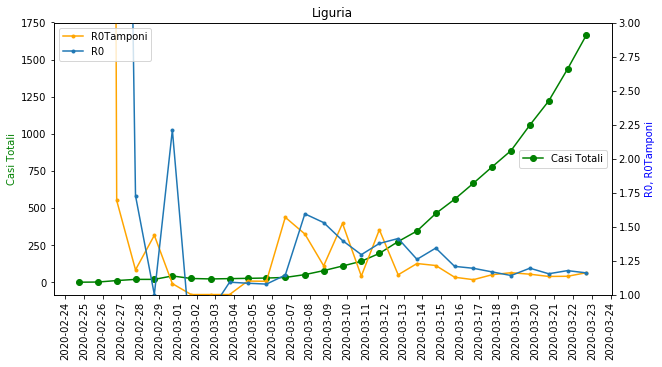

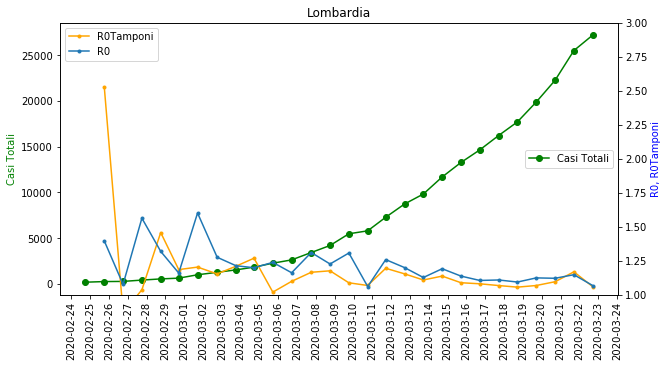

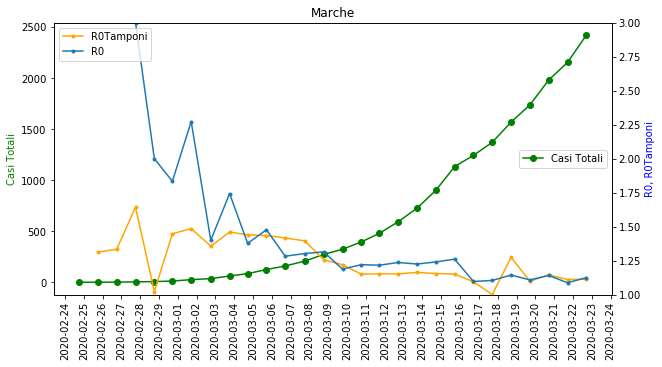

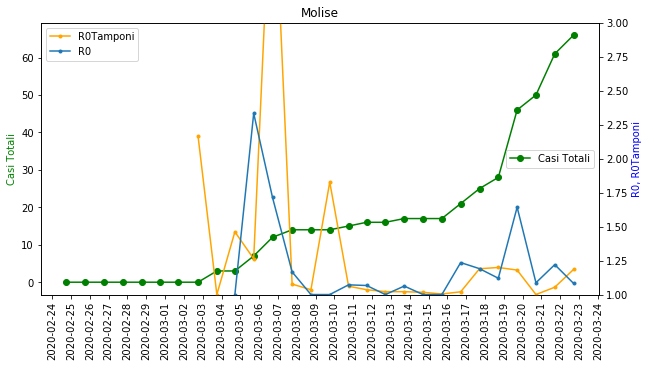

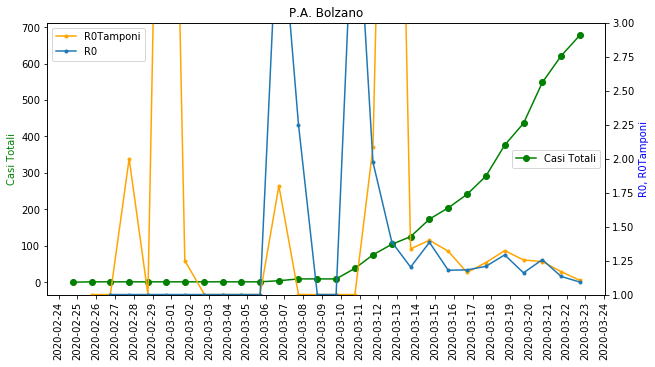

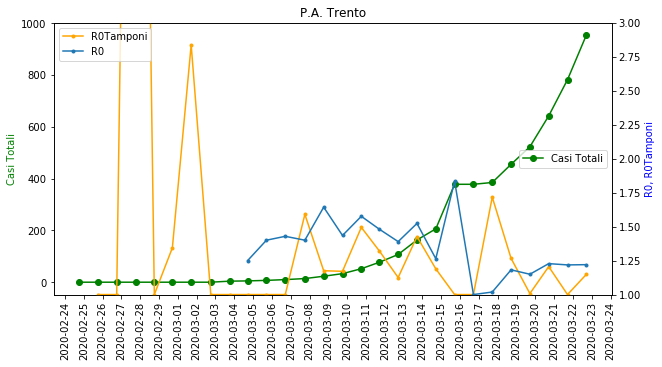

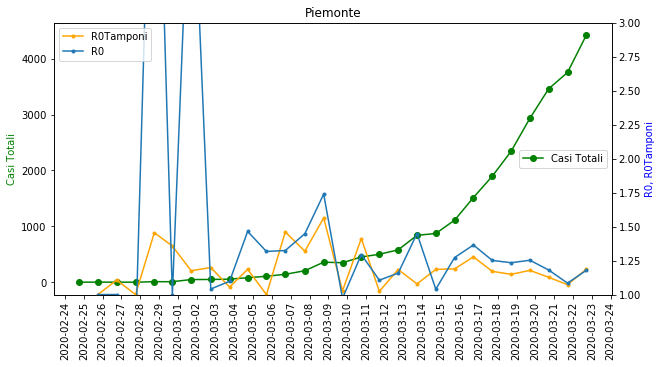

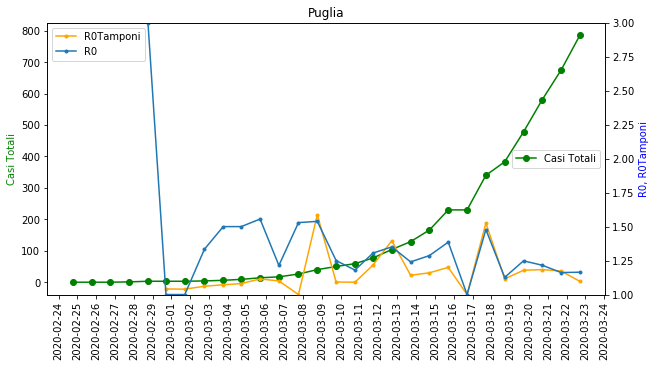

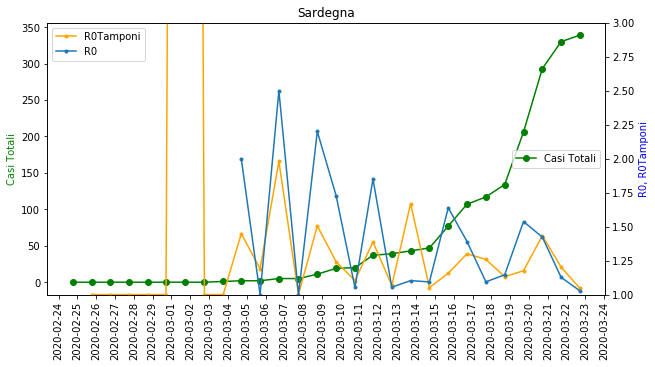

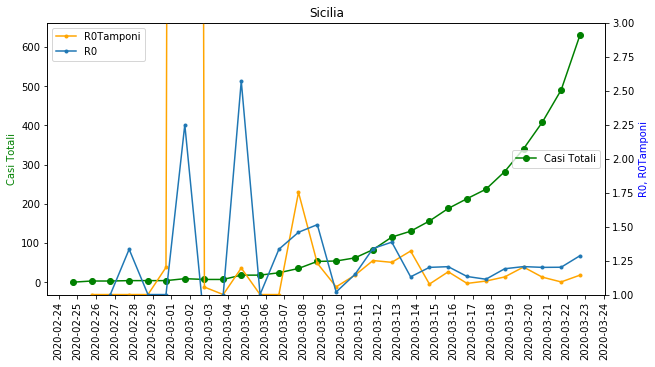

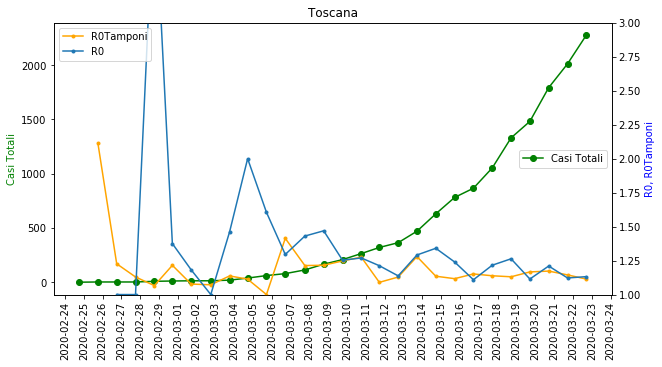

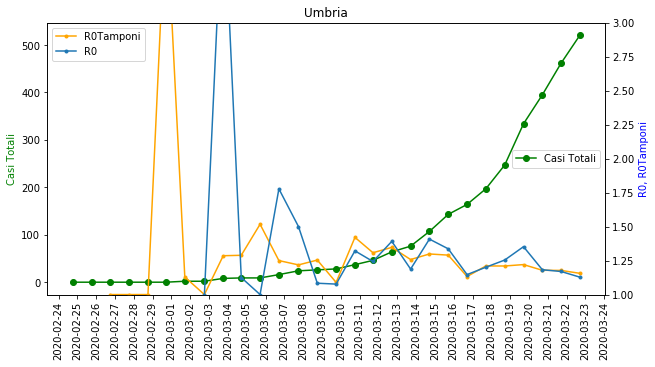

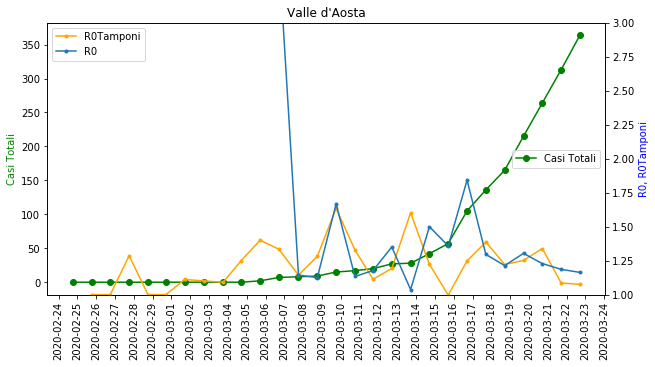

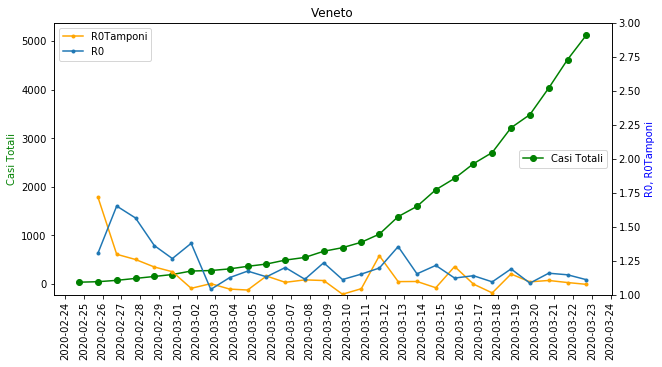

In [9]:
regioni=np.unique(data_regioni.denominazione_regione)

for reg in regioni:
    dat_reg=data_regioni[data_regioni.denominazione_regione==reg]
    fig, ax1 = plt.subplots(figsize=(10,5))

    ax2 = ax1.twinx()
    ax1.plot(pd.to_datetime(dat_reg.data),dat_reg.totale_casi,marker='o', color='green', label="Casi Totali")
    ax2.plot(pd.to_datetime(dat_reg.data),dat_reg.tamponi/dat_reg.tamponi.shift(1),marker='.', color='orange', label="R0Tamponi")
    ax2.plot(pd.to_datetime(dat_reg.data),dat_reg.totale_casi/dat_reg.totale_casi.shift(1),marker='.', label="R0")

    ax1.set_ylabel('Casi Totali', color='g')
    ax2.set_ylabel('R0, R0Tamponi', color='b')
    ax2.set_ylim([1,3])

    plt.setp( ax1.xaxis.get_majorticklabels(), rotation=90 )
    ax1.xaxis.set_major_locator(mdates.DayLocator())
    plt.title(reg)
    ax1.legend(loc='center right')
    ax2.legend(loc='upper left')
    plt.show()
